In [4]:
import osmnx as ox
import matplotlib
import geopandas as gpd
print(f"OSMnx version: {ox.__version__}")

OSMnx version: 2.0.3


In [27]:
city_name = "Barcelona, Spain"

In [28]:
G = ox.graph_from_place(city_name, network_type="drive")
print(f"Downloaded street network for {city_name}")

Downloaded street network for Barcelona, Spain


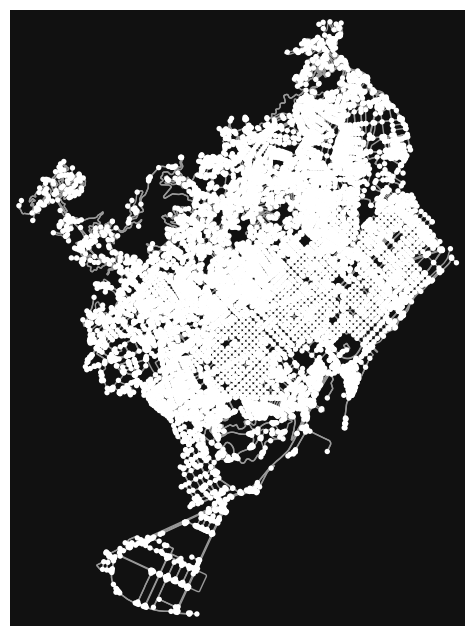

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [29]:
ox.plot_graph(G)

In [ ]:
import osmnx as ox

# Define the bounding box as a tuple: (north, south, east, west)
bbox = (41.385, 41.375, 2.176, 2.172)

# Download the street network using the bbox tuple
G = ox.graph.graph_from_bbox(bbox=bbox, network_type='drive')

# Plot the network
ox.plot_graph(G)

<Axes: >

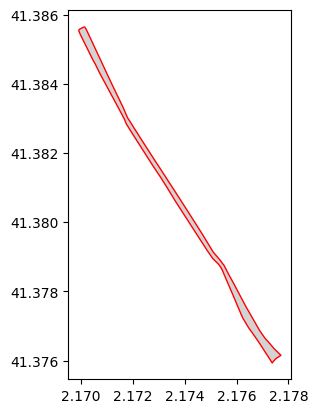

In [4]:
# Plot the area
area.plot(facecolor='lightgrey', edgecolor='red')

Downloaded street network for (41.38634, 2.16759)


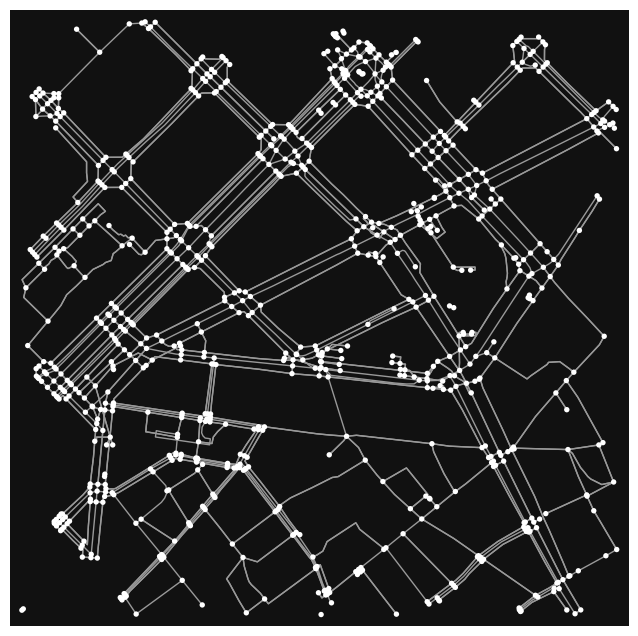

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
#Athens: 
#37.989702027509686, 23.738142824327344
#Barceclona:
#41.38634, 2.16759

center_point = (41.38634, 2.16759)
network_type = 'all' # "all_public", "all", "bike", "drive", "drive_service", "walk"
custom_filter = (
    '["highway"~"motorway|trunk|primary|secondary|tertiary|footway|pedestrian|path|steps"]'
)

G=ox.graph.graph_from_point(
    center_point, 420, 
    dist_type='bbox', 
    network_type=network_type, 
    simplify=True, 
    retain_all=True, 
    truncate_by_edge=False, 
    custom_filter=None)

print(f"Downloaded street network for {center_point}")

ox.plot_graph(G)

In [9]:
road_colors = {
    'motorway': 'red',
    'trunk': 'orange',
    'primary': 'yellow',
    'secondary': 'green',
    'tertiary': 'blue',
    'footway': 'purple',
    'pedestrian': 'pink',
    'path': 'brown',
    'steps': 'gray'
}

In [10]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

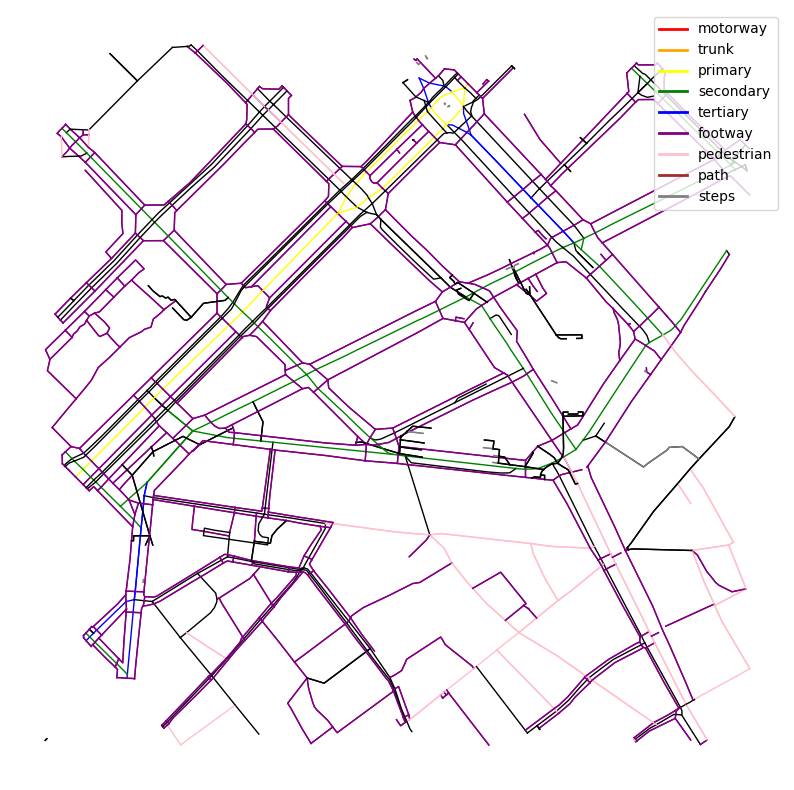

In [11]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each road and plot with its color
for idx, row in edges.iterrows():
    # Sometimes highway is a list, sometimes a string
    highway_type = row['highway']
    if isinstance(highway_type, list):
        highway_type = highway_type[0]  # take the first one

    color = road_colors.get(highway_type, 'black')  # default to black if not found
    g = row['geometry']
    if g is not None:
        if g.geom_type == 'LineString':
            ax.plot(*g.xy, color=color, linewidth=1)
        elif g.geom_type == 'MultiLineString':
            for linestring in g:
                ax.plot(*linestring.xy, color=color, linewidth=1)

# Set axis off
ax.axis('off')

# Optional: add a legend manually
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=color, lw=2, label=road_type)
    for road_type, color in road_colors.items()
]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

In [12]:

import neatnet

C:\Users\froum\Github\OpenProceduralCitiesCore\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
local_crs =  25831
osm_graph = ox.projection.project_graph(G, to_crs=local_crs)

streets = ox.graph_to_gdfs(
    ox.convert.to_undirected(osm_graph),
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True,
).reset_index(drop=True)

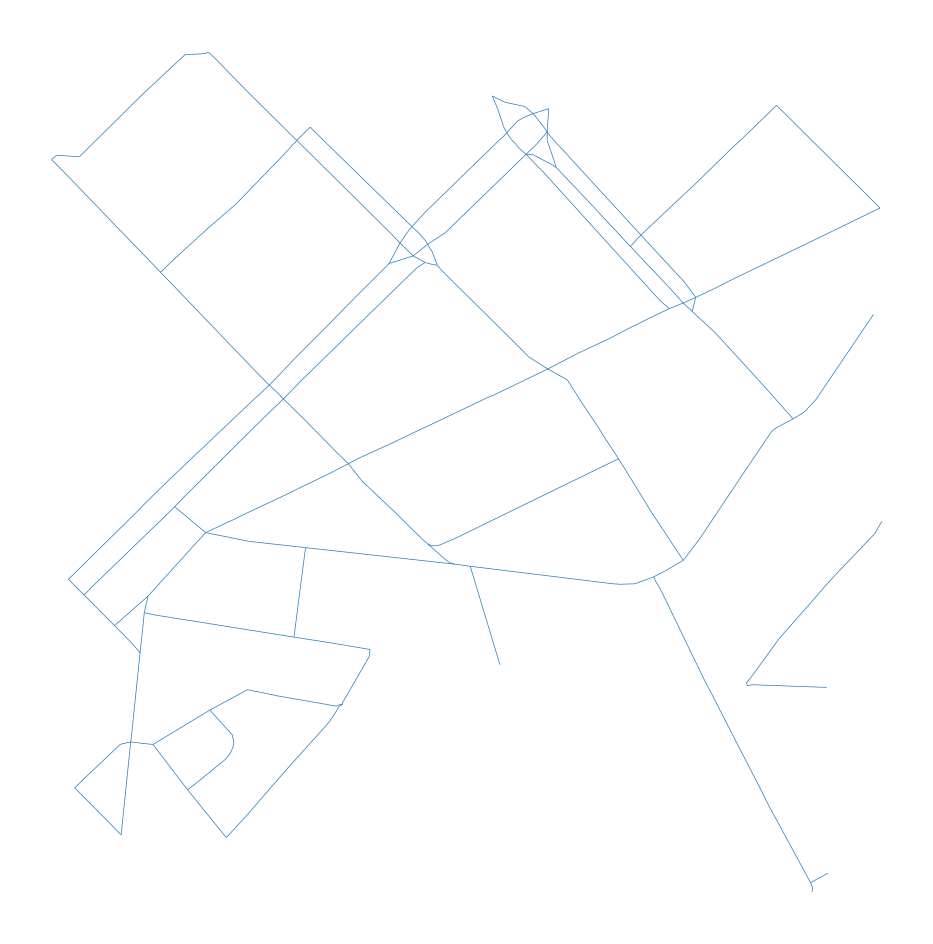

In [128]:
ax = streets.plot(figsize=(12, 12), linewidth=0.5)
ax.set_axis_off()

In [129]:
buildings = (
    ox.features.features_from_point(
        center_point=center_point,
        dist=220,
        tags={"building": True}
    )
    .query('building != "roof"')
    .to_crs(edges.crs)
)

In [130]:
simplified = neatnet.neatify(streets, exclusion_mask=buildings.geometry)

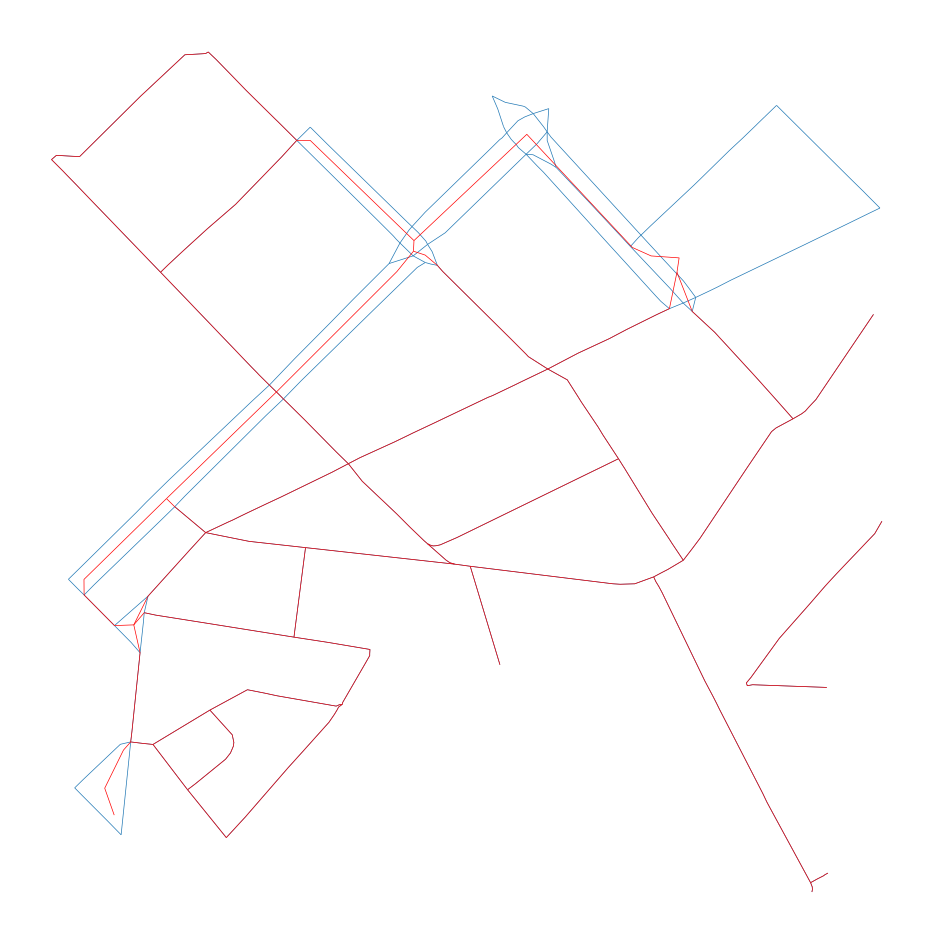

In [131]:
ax = streets.plot(figsize=(12, 12), linewidth=0.5)
simplified.plot(color="red", linewidth=0.5, ax=ax)
ax.set_axis_off()